# Car Emission Classification

New EPA requirements for gasoline cars (goal is 40 MPG), can a model predict the MPG rating just based on car specifications? 

## Importing

In [1]:
import numpy as np # linear algebra
import pandas as pd
import os
import random
from random import randint
random.seed(10)
import seaborn as sns
import matplotlib as plt

In [2]:
os. getcwd()

'C:\\Users\\User\\Documents\\Practice Code'

## Quick Data Cleaning

In [3]:
# Importing Data
data = pd.read_csv(r'Fuel_1.csv', sep=',', encoding='latin-1')
data

,Year,Make,Model,Veh Class,(L),Cyl,Trans,Type,City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Cmb MPG,(g/km),CO2 Rating,Smog Rating
0,2023.0,Alfa Romeo,Giulia,Mid-size,2.0,4.0,A8,Z,10.0,7.2,8.7,32.0,205.0,5.0,5.0
1,2023.0,Alfa Romeo,Giulia AWD,Mid-size,2.0,4.0,A8,Z,10.5,7.7,9.2,31.0,217.0,5.0,5.0
2,2023.0,Alfa Romeo,Giulia Quadrifoglio,Mid-size,2.9,6.0,A8,Z,13.5,9.3,11.6,24.0,271.0,4.0,3.0
3,2023.0,Alfa Romeo,Stelvio,SUV: Small,2.0,4.0,A8,Z,10.3,8.1,9.3,30.0,218.0,5.0,5.0
4,2023.0,Alfa Romeo,Stelvio AWD,SUV: Small,2.0,4.0,A8,Z,10.8,8.3,9.6,29.0,226.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,2023.0,Volkswagen,ID.4 Pro,SUV: Small,NaN,NaN,A1,Electricity,2.0,2.4,2.2,106.9,0.0,NaN,NaN
997,2023.0,Volkswagen,ID.4 AWD Pro,SUV: Small,NaN,NaN,A1,Electricity,2.0,2.4,2.2,106.9,0.0,NaN,NaN
998,2023.0,Volvo,C40 Recharge Twin,SUV: Small,NaN,NaN,A1,Electricity,2.3,2.5,2.4,98.0,0.0,NaN,NaN
999,2023.0,Volvo,XC40 Recharge Twin,SUV: Small,NaN,NaN,A1,Electricity,2.5,2.9,2.7,87.1,0.0,NaN,NaN


In [4]:
#Removing Last Row of empty cells
df0 = pd.DataFrame(data)
df = df0.drop(df0.index[1000])
df

,Year,Make,Model,Veh Class,(L),Cyl,Trans,Type,City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Cmb MPG,(g/km),CO2 Rating,Smog Rating
0,2023.0,Alfa Romeo,Giulia,Mid-size,2.0,4.0,A8,Z,10.0,7.2,8.7,32.0,205.0,5.0,5.0
1,2023.0,Alfa Romeo,Giulia AWD,Mid-size,2.0,4.0,A8,Z,10.5,7.7,9.2,31.0,217.0,5.0,5.0
2,2023.0,Alfa Romeo,Giulia Quadrifoglio,Mid-size,2.9,6.0,A8,Z,13.5,9.3,11.6,24.0,271.0,4.0,3.0
3,2023.0,Alfa Romeo,Stelvio,SUV: Small,2.0,4.0,A8,Z,10.3,8.1,9.3,30.0,218.0,5.0,5.0
4,2023.0,Alfa Romeo,Stelvio AWD,SUV: Small,2.0,4.0,A8,Z,10.8,8.3,9.6,29.0,226.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023.0,Volkswagen,ID.4,SUV: Small,NaN,NaN,A1,Electricity,2.0,2.2,2.1,112.0,0.0,NaN,NaN
996,2023.0,Volkswagen,ID.4 Pro,SUV: Small,NaN,NaN,A1,Electricity,2.0,2.4,2.2,106.9,0.0,NaN,NaN
997,2023.0,Volkswagen,ID.4 AWD Pro,SUV: Small,NaN,NaN,A1,Electricity,2.0,2.4,2.2,106.9,0.0,NaN,NaN
998,2023.0,Volvo,C40 Recharge Twin,SUV: Small,NaN,NaN,A1,Electricity,2.3,2.5,2.4,98.0,0.0,NaN,NaN


In [5]:
# Filling all NaN values with Zero (all NaN values come from Electric Vehicles which dont have cyl and liter engines + co2/smog ratings)
df['(L)'] = df['(L)'].fillna(0)
df['Cyl'] = df['Cyl'].fillna(0)
df['CO2 Rating'] = df['CO2 Rating'].fillna(0)
df['Smog Rating'] = df['Smog Rating'].fillna(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             1000 non-null   float64
 1   Make             1000 non-null   object 
 2   Model            1000 non-null   object 
 3   Veh Class        1000 non-null   object 
 4   (L)              1000 non-null   float64
 5   Cyl              1000 non-null   float64
 6   Trans            1000 non-null   object 
 7   Type             1000 non-null   object 
 8   City (L/100 km)  1000 non-null   float64
 9   Hwy (L/100 km)   1000 non-null   float64
 10  Comb (L/100 km)  1000 non-null   float64
 11  Cmb MPG          1000 non-null   float64
 12  (g/km)           1000 non-null   float64
 13  CO2 Rating       1000 non-null   float64
 14  Smog Rating      1000 non-null   float64
dtypes: float64(10), object(5)
memory usage: 117.3+ KB


# Dimensionality Reduction and Feature Engineering 

Removing redundant features and changing data type to appropriate types

In [18]:
# x = MPG, if x > 40 => pass the requirement
df2 = df.copy()
def EPArate(x):
    y = 'Yes'
    n = 'No'
    if x > 40:
        return y
    else:
        return n
    
        
df2['label'] = df['Cmb MPG'].apply(EPArate)  
df2

,Year,Make,Model,Veh Class,(L),Cyl,Trans,Type,City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Cmb MPG,(g/km),CO2 Rating,Smog Rating,label
0,2023.0,Alfa Romeo,Giulia,Mid-size,2.0,4.0,A8,Z,10.0,7.2,8.7,32.0,205.0,5.0,5.0,No
1,2023.0,Alfa Romeo,Giulia AWD,Mid-size,2.0,4.0,A8,Z,10.5,7.7,9.2,31.0,217.0,5.0,5.0,No
2,2023.0,Alfa Romeo,Giulia Quadrifoglio,Mid-size,2.9,6.0,A8,Z,13.5,9.3,11.6,24.0,271.0,4.0,3.0,No
3,2023.0,Alfa Romeo,Stelvio,SUV: Small,2.0,4.0,A8,Z,10.3,8.1,9.3,30.0,218.0,5.0,5.0,No
4,2023.0,Alfa Romeo,Stelvio AWD,SUV: Small,2.0,4.0,A8,Z,10.8,8.3,9.6,29.0,226.0,5.0,5.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023.0,Volkswagen,ID.4,SUV: Small,0.0,0.0,A1,Electricity,2.0,2.2,2.1,112.0,0.0,0.0,0.0,Yes
996,2023.0,Volkswagen,ID.4 Pro,SUV: Small,0.0,0.0,A1,Electricity,2.0,2.4,2.2,106.9,0.0,0.0,0.0,Yes
997,2023.0,Volkswagen,ID.4 AWD Pro,SUV: Small,0.0,0.0,A1,Electricity,2.0,2.4,2.2,106.9,0.0,0.0,0.0,Yes
998,2023.0,Volvo,C40 Recharge Twin,SUV: Small,0.0,0.0,A1,Electricity,2.3,2.5,2.4,98.0,0.0,0.0,0.0,Yes


In [19]:
df2 = df2.drop(['Year', 'Model','Make', 'City (L/100 km)',
               'Hwy (L/100 km)', 'Comb (L/100 km)', 'CO2 Rating', 'Smog Rating', 'Cmb MPG'], axis=1)
df2["Veh Class"] = df2["Veh Class"].astype("category")
df2["(L)"] = df2["(L)"].astype("category")
df2["Cyl"] = df2["Cyl"].astype("category")
df2["Trans"] = df2["Trans"].astype("category")
df2["Type"] = df2["Type"].astype("category")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Veh Class  1000 non-null   category
 1   (L)        1000 non-null   category
 2   Cyl        1000 non-null   category
 3   Trans      1000 non-null   category
 4   Type       1000 non-null   category
 5   (g/km)     1000 non-null   float64 
 6   label      1000 non-null   object  
dtypes: category(5), float64(1), object(1)
memory usage: 23.9+ KB


Generating new feature (our label)

In [20]:
df2

,Veh Class,(L),Cyl,Trans,Type,(g/km),label
0,Mid-size,2.0,4.0,A8,Z,205.0,No
1,Mid-size,2.0,4.0,A8,Z,217.0,No
2,Mid-size,2.9,6.0,A8,Z,271.0,No
3,SUV: Small,2.0,4.0,A8,Z,218.0,No
4,SUV: Small,2.0,4.0,A8,Z,226.0,No
...,...,...,...,...,...,...,...
995,SUV: Small,0.0,0.0,A1,Electricity,0.0,Yes
996,SUV: Small,0.0,0.0,A1,Electricity,0.0,Yes
997,SUV: Small,0.0,0.0,A1,Electricity,0.0,Yes
998,SUV: Small,0.0,0.0,A1,Electricity,0.0,Yes


# AutoML test 

In [12]:
import h2o
from h2o.estimators.infogram import H2OInfogram
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 20.0.1+9-29, mixed mode, sharing)
  Starting server from C:\Users\User\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\User\AppData\Local\Temp\tmp9r7m91kd
  JVM stdout: C:\Users\User\AppData\Local\Temp\tmp9r7m91kd\h2o_User_started_from_python.out
  JVM stderr: C:\Users\User\AppData\Local\Temp\tmp9r7m91kd\h2o_User_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Asia/Singapore
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,1 month and 11 days
H2O_cluster_name:,H2O_from_python_User_2ru0dt
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.836 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [14]:
!nvidia-smi

Thu Jun  8 22:37:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.24       Driver Version: 528.24       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   50C    P8     5W /  60W |    431MiB /  4096MiB |     20%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
hf = h2o.H2OFrame(df2)
hf["Veh Class"] = hf["Veh Class"].asfactor()
hf["Trans"] = hf["Trans"].asfactor()
train, test, valid = hf.split_frame(seed=1, ratios=[.7, .15])

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [22]:
y = "label"
x = train.columns
x.remove(y)

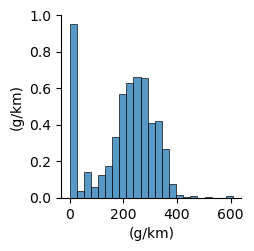

In [23]:
# Seeing the relationship between our quantitative features
sns.pairplot(df2)

In [24]:
hf.types

{'Veh Class': 'enum',
 '(L)': 'real',
 'Cyl': 'int',
 'Trans': 'enum',
 'Type': 'enum',
 '(g/km)': 'int',
 'label': 'enum'}

In [25]:
hf.describe()

Rows:1000
Cols:7

,Veh Class,(L),Cyl,Trans,Type,(g/km),label
type,enum,real,int,enum,enum,int,enum
mins,,0.0,0.0,,,0.0,
mean,,2.5871000000000035,4.627000000000002,,,203.09900000000036,
maxs,,8.0,16.0,,,608.0,
sigma,,1.7061813047401044,2.7596170905555892,,,115.59954348289396,
zeros,,171,171,,,171,
missing,0,0,0,0,0,0,0
0,Mid-size,2.0,4.0,A8,Z,205.0,No
1,Mid-size,2.0,4.0,A8,Z,217.0,No
2,Mid-size,2.9,6.0,A8,Z,271.0,No


In [26]:
aml = H2OAutoML(max_models = 10, seed = 10, verbosity="info", nfolds=5)

In [27]:
aml.train(x = x, y = y, training_frame = train, validation_frame=valid)

AutoML progress: |
22:38:17.978: Project: AutoML_1_20230608_223817
22:38:17.981: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
22:38:17.981: Setting stopping tolerance adaptively based on the training frame: 0.03782347372361169
22:38:17.981: Build control seed: 10
22:38:17.982: training frame: Frame key: AutoML_1_20230608_223817_training_py_10_sid_92de    cols: 7    rows: 699  chunks: 1    size: 10761  checksum: -5720630701058161506
22:38:17.982: validation frame: Frame key: py_12_sid_92de    cols: 7    rows: 151  chunks: 1    size: 6856  checksum: -7193665080818331722
22:38:17.982: leaderboard frame: NULL
22:38:17.982: blending frame: NULL
22:38:17.982: response column: label
22:38:17.982: fold column: null
22:38:17.982: weights column: null
22:38:17.992: AutoML: XGBoost is no

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_3_AutoML_1_20230608_223817


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    334                334                         114660                 2            8            7.91916       3             35            22.5838

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 2.4463949523243947e-18
RMSE: 1.564095570073771e-09
LogLoss: 1.1614149345022177e-10
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9999999997229062
       No    Yes    Error    Rate
-----  ----  -----  -------  -----------
No     511   0      0        (0.0/511.0)
Yes    0     188    0        (0.0/188.0)
Total  511   188    0        (0.0/699.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value    idx
---------------------------  -----------  -------  -----
max f1                       1            1        0
max f2                       1            1        0
max f0point5                 1            1        0
max accuracy                 1            1        0
max precision                1            1        0
max recall                   1            1        0
max specificity              1            1        0
max absolute_mcc             1            1        0
max min_per_class_accuracy   1            1        0
max mean_per_class_accuracy  1            1        0
max tns                      1            511      0
max fns                      1            0        0
max fps                      1.89923e-15  511      399
max tps                      1            188      0
max tnr                      1            1        0
max fnr                      1            0        0
max fpr                      1.89923e-15  1        399
max tpr                      1            1        0

Gains/Lift Table: Avg response rate: 26.90 %, avg score: 26.90 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0243205                   1                  3.71809  3.71809            1                1            1                           1                   0.0904255       0.0904255                  271.809  271.809            0.0904255
2        0.0572246                   1                  3.71809  3.71809            1                1            1                           1                   0.12234         0.212766                   271.809  271.809            0.212766
3        0.100143                    1                  3.71809  3.71809            1                1            1                           1                   0.159574        0.37234                    271.809  271.809            0.37234
4        0.174535                    1                  3.71809  3.71809            1                1            1                           1                   0.276596        0.648936                   271.809  271.809            0.648936
5        0.200286                    1                  3.71809  3.71809            1                1            1                           1                   0.0957447       0.744681                   271.809  271.809            0.744681
6    

In [28]:
lb = aml.leaderboard

In [29]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_3_AutoML_1_20230608_223817,1,0.00442156,1,0,0.0393278,0.00154668
StackedEnsemble_BestOfFamily_1_AutoML_1_20230608_223817,1,0.00112927,1,0,0.0136355,0.000185927
GBM_2_AutoML_1_20230608_223817,1,0.00408141,1,0,0.0350687,0.00122982
DRF_1_AutoML_1_20230608_223817,1,0.00550793,1,0,0.0283496,0.000803699
GBM_4_AutoML_1_20230608_223817,1,0.00252575,1,0,0.0300505,0.000903033
GBM_5_AutoML_1_20230608_223817,1,0.000216598,1,0,0.00355349,1.26273e-05
StackedEnsemble_AllModels_1_AutoML_1_20230608_223817,1,0.000319756,1,0,0.00413263,1.70787e-05
GBM_1_AutoML_1_20230608_223817,1,0.00462435,1,0,0.0360195,0.0012974
XRT_1_AutoML_1_20230608_223817,1,0.0284675,1,0,0.0536123,0.00287428
GBM_grid_1_AutoML_1_20230608_223817_model_1,1,0.00352354,1,0,0.0329288,0.00108431


In [30]:
pred=aml.leader.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [31]:
pred.head()

predict,No,Yes
No,1,5.79867e-15
No,1,1.48574e-14
No,1,5.63123e-14
No,1,2.03306e-14
No,1,2.66972e-15
No,1,5.04229e-15
No,1,2.1768e-14
No,1,7.50016e-13
No,1,8.50259e-11
No,1,1.63511e-13


In [32]:
# Performance on test set
aml.leader.model_performance(test)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 5.924853050418652e-20
RMSE: 2.4341021035319474e-10
LogLoss: 4.888008001322847e-11
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9999999999999885
       No    Yes    Error    Rate
-----  ----  -----  -------  ------------
No     108   0      0        (0.0/108.0)
Yes    40    2      0.9524   (40.0/42.0)
Total  148   2      0.2667   (40.0/150.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       1            1         26
max f2                       1            1         26
max f0point5                 1            1         26
max accuracy                 1            1         26
max precision                1            1         0
max recall                   1            1         26
max specificity              1            1         0
max absolute_mcc             1            1         26
max min_per_class_accuracy   1            1         26
max mean_per_class_accuracy  1            1         26
max tns                      1            108       0
max fns                      1            40        0
max fps                      1.8993e-15   108       133
max tps                      1            42        26
max tnr                      1            1         0
max fnr                      1            0.952381  0
max fpr                      1.8993e-15   1         133
max tpr                      1            1         26

Gains/Lift Table: Avg response rate: 28.00 %, avg score: 28.00 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0133333                   1                  3.57143  3.57143            1                1            1                           1                   0.047619        0.047619                   257.143  257.143            0.047619
2        0.0333333                   1                  3.57143  3.57143            1                1            1                           1                   0.0714286       0.119048                   257.143  257.143            0.119048
3        0.0333333                   1                  0        3.57143            0                0            1                           1                   0               0.119048                   -100     257.143            0.119048
4        0.0533333                   1                  3.57143  3.57143            1                1            1                           1                   0.0714286       0.190476                   257.143  257.143            0.190476
5        0.0533333                   1                  0        3.57143            0                0            1                           1                   0               0.190476                   -100     257.143            0.190476
6        0.1                         1                  3.57143  3.57143            1                1            1                           1                   0.166667        0.357143                   257.143  257.143            0.357143
7        0.153333                    1                  3.57143  3.57143            1                1            1                           1                   0.190476        0.547619                   257.143  257.143            0.547619
8        0.2                         1                  3.57143  3.57143            1            

In [33]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [34]:
model_ids

['GBM_3_AutoML_1_20230608_223817',
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20230608_223817',
 'GBM_2_AutoML_1_20230608_223817',
 'DRF_1_AutoML_1_20230608_223817',
 'GBM_4_AutoML_1_20230608_223817',
 'GBM_5_AutoML_1_20230608_223817',
 'StackedEnsemble_AllModels_1_AutoML_1_20230608_223817',
 'GBM_1_AutoML_1_20230608_223817',
 'XRT_1_AutoML_1_20230608_223817',
 'GBM_grid_1_AutoML_1_20230608_223817_model_1',
 'GLM_1_AutoML_1_20230608_223817',
 'DeepLearning_1_AutoML_1_20230608_223817']

In [35]:
# Getting model details of specific models (copy+paste using model_ids from above)
out = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [36]:
out

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_3_AutoML_1_20230608_223817


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    334                334                         114660                 2            8            7.91916       3             35            22.5838

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 2.4463949523243947e-18
RMSE: 1.564095570073771e-09
LogLoss: 1.1614149345022177e-10
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9999999997229062
       No    Yes    Error    Rate
-----  ----  -----  -------  -----------
No     511   0      0        (0.0/511.0)
Yes    0     188    0        (0.0/188.0)
Total  511   188    0        (0.0/699.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value    idx
---------------------------  -----------  -------  -----
max f1                       1            1        0
max f2                       1            1        0
max f0point5                 1            1        0
max accuracy                 1            1        0
max precision                1            1        0
max recall                   1            1        0
max specificity              1            1        0
max absolute_mcc             1            1        0
max min_per_class_accuracy   1            1        0
max mean_per_class_accuracy  1            1        0
max tns                      1            511      0
max fns                      1            0        0
max fps                      1.89923e-15  511      399
max tps                      1            188      0
max tnr                      1            1        0
max fnr                      1            0        0
max fpr                      1.89923e-15  1        399
max tpr                      1            1        0

Gains/Lift Table: Avg response rate: 26.90 %, avg score: 26.90 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0243205                   1                  3.71809  3.71809            1                1            1                           1                   0.0904255       0.0904255                  271.809  271.809            0.0904255
2        0.0572246                   1                  3.71809  3.71809            1                1            1                           1                   0.12234         0.212766                   271.809  271.809            0.212766
3        0.100143                    1                  3.71809  3.71809            1                1            1                           1                   0.159574        0.37234                    271.809  271.809            0.37234
4        0.174535                    1                  3.71809  3.71809            1                1            1                           1                   0.276596        0.648936                   271.809  271.809            0.648936
5        0.200286                    1                  3.71809  3.71809            1                1            1                           1                   0.0957447       0.744681                   271.809  271.809            0.744681
6    

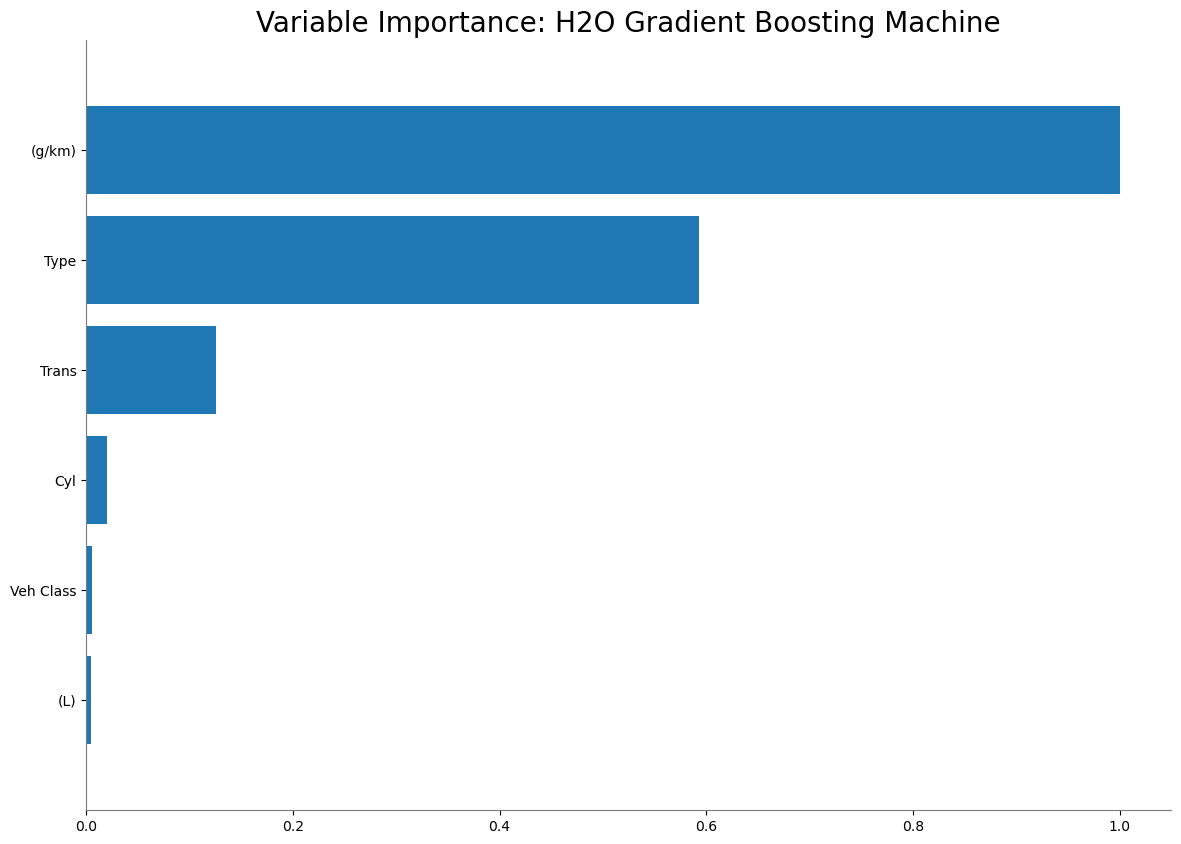

In [37]:
out.varimp_plot()

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_3_AutoML_1_20230608_223817

,No,Yes,Error,Rate
No,108.0,0.0,0.0,(0.0/108.0)
Yes,40.0,2.0,0.9524,(40.0/42.0)
Total,148.0,2.0,0.2667,(40.0/150.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

<Figure size 640x480 with 0 Axes>

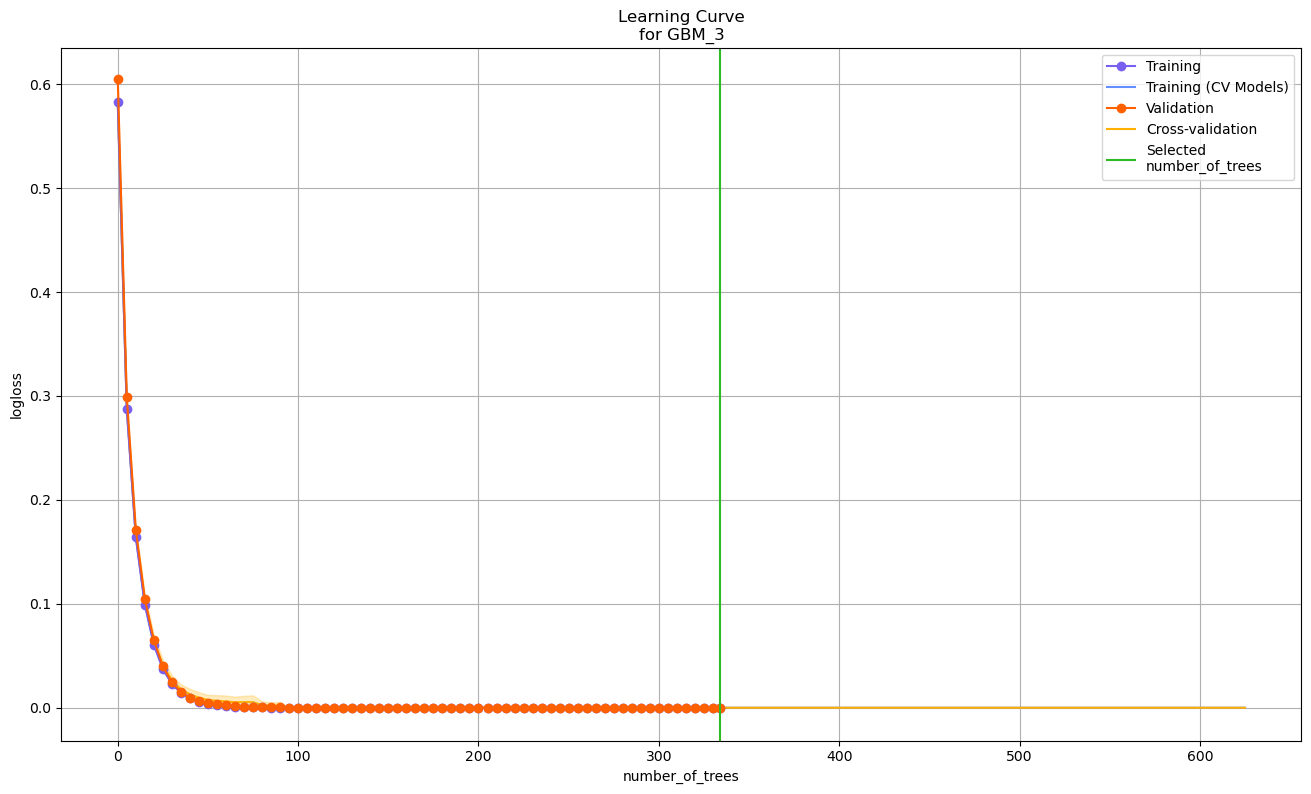

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

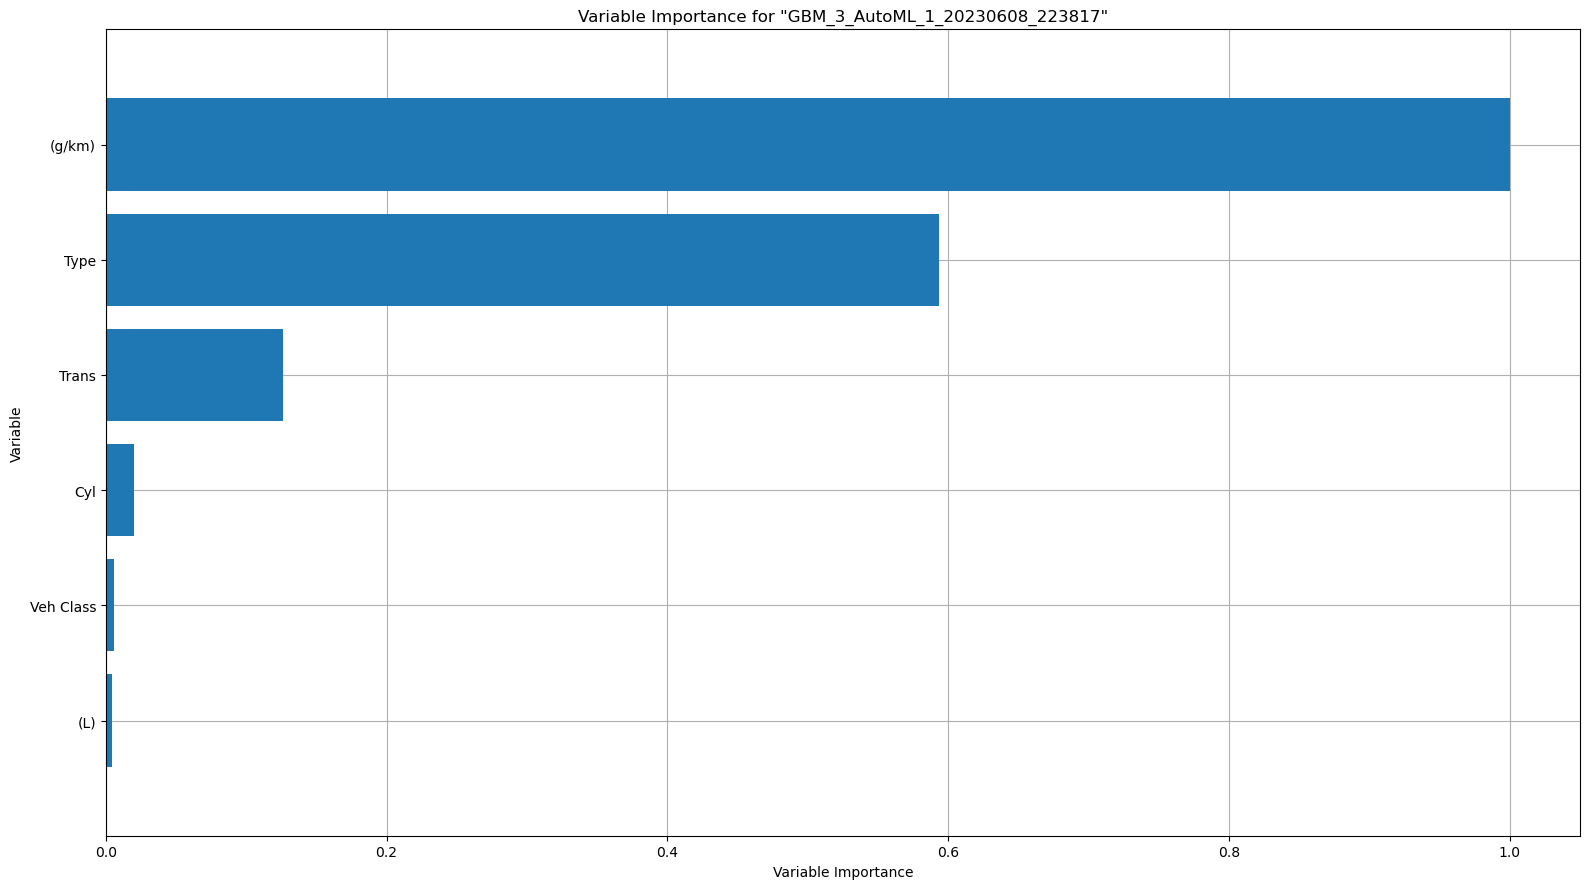

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

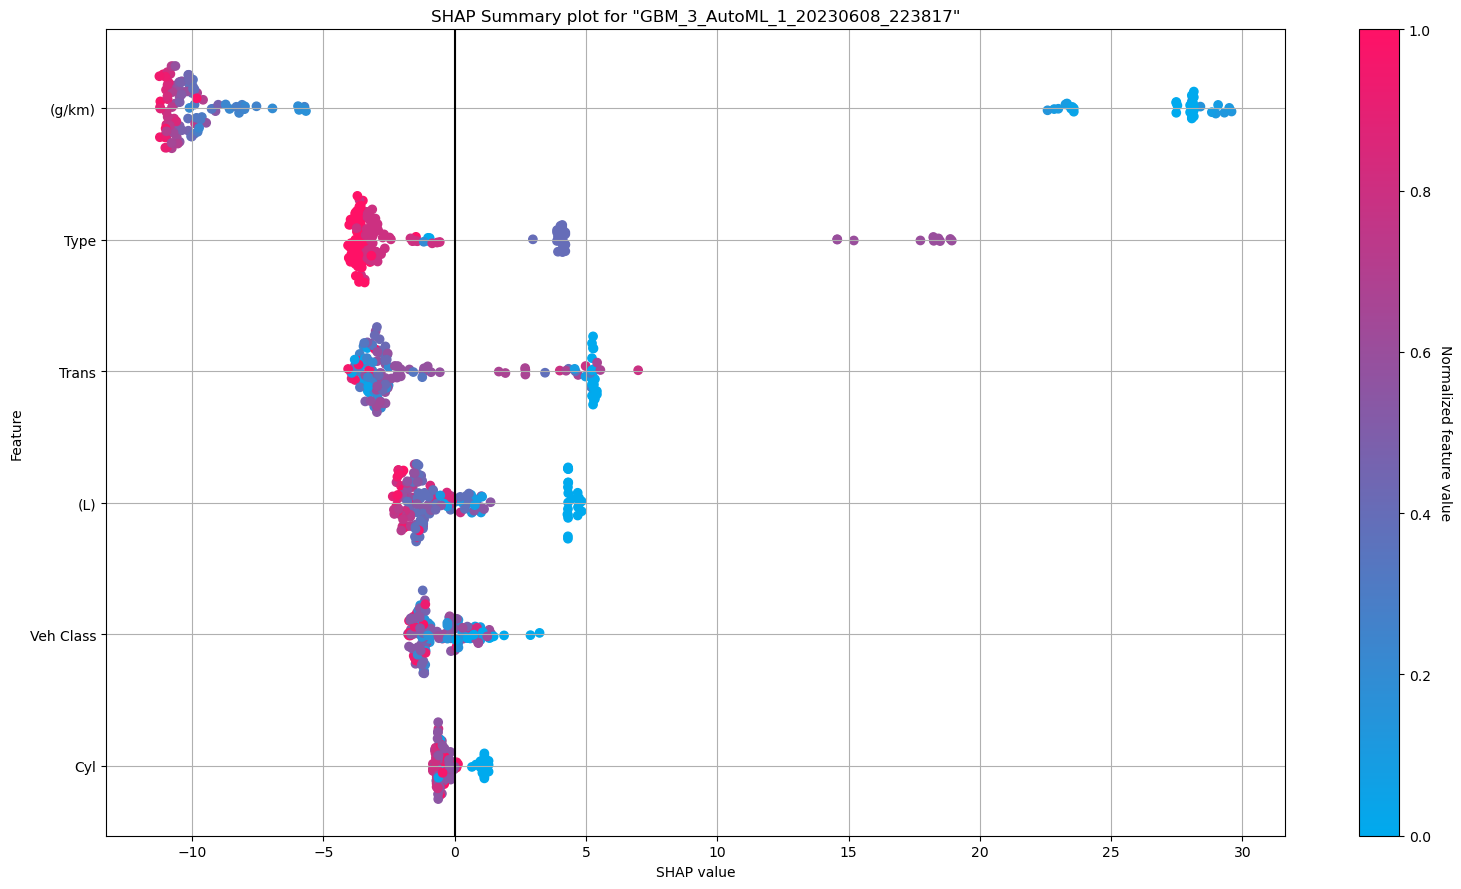

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

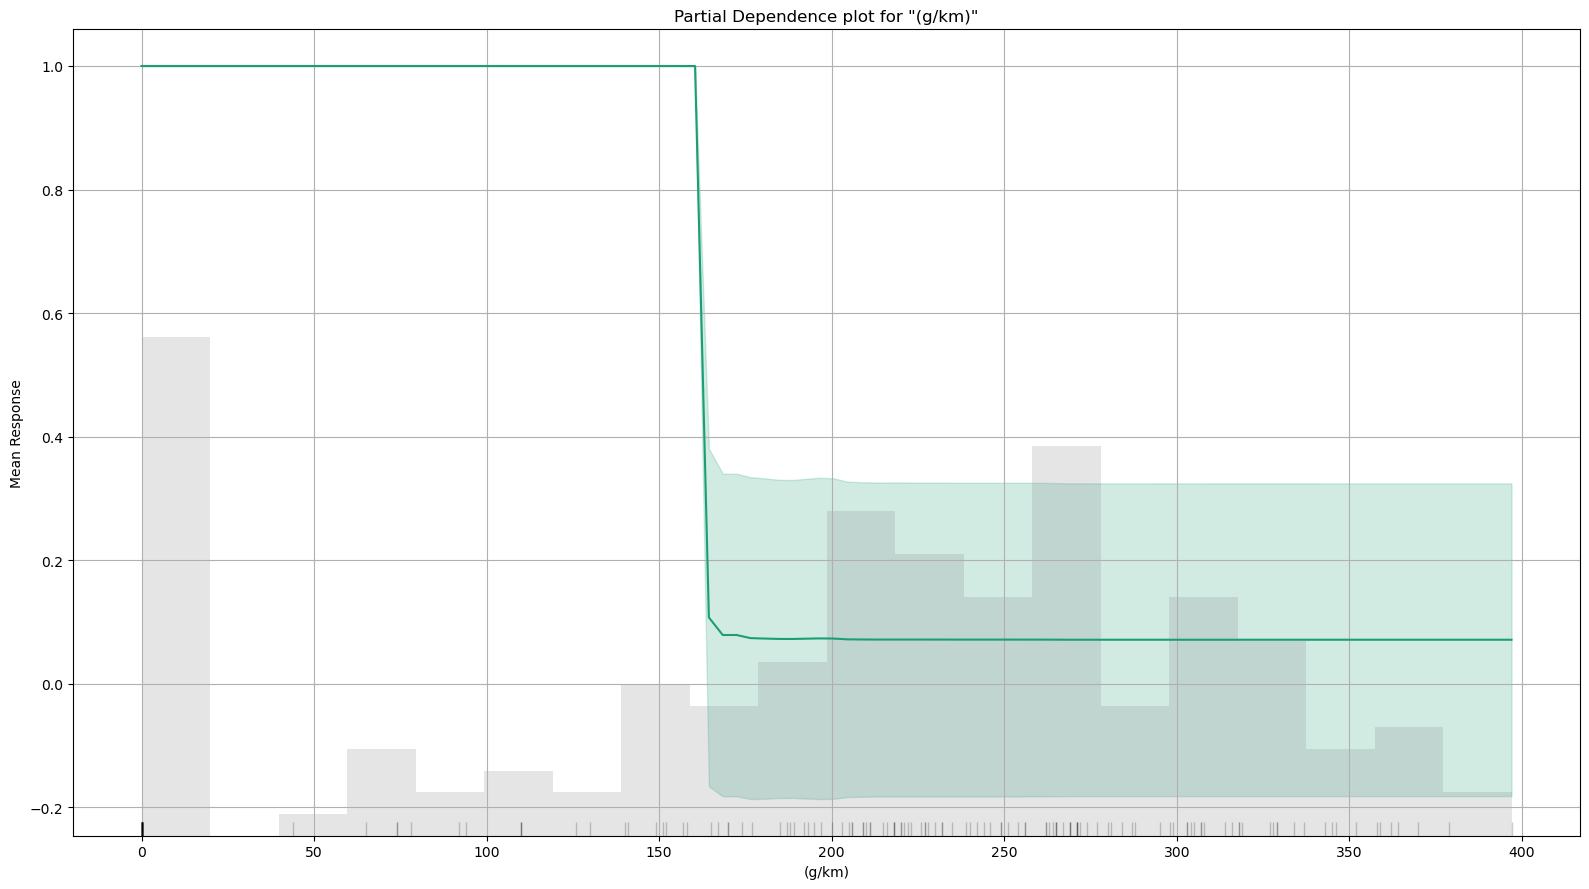

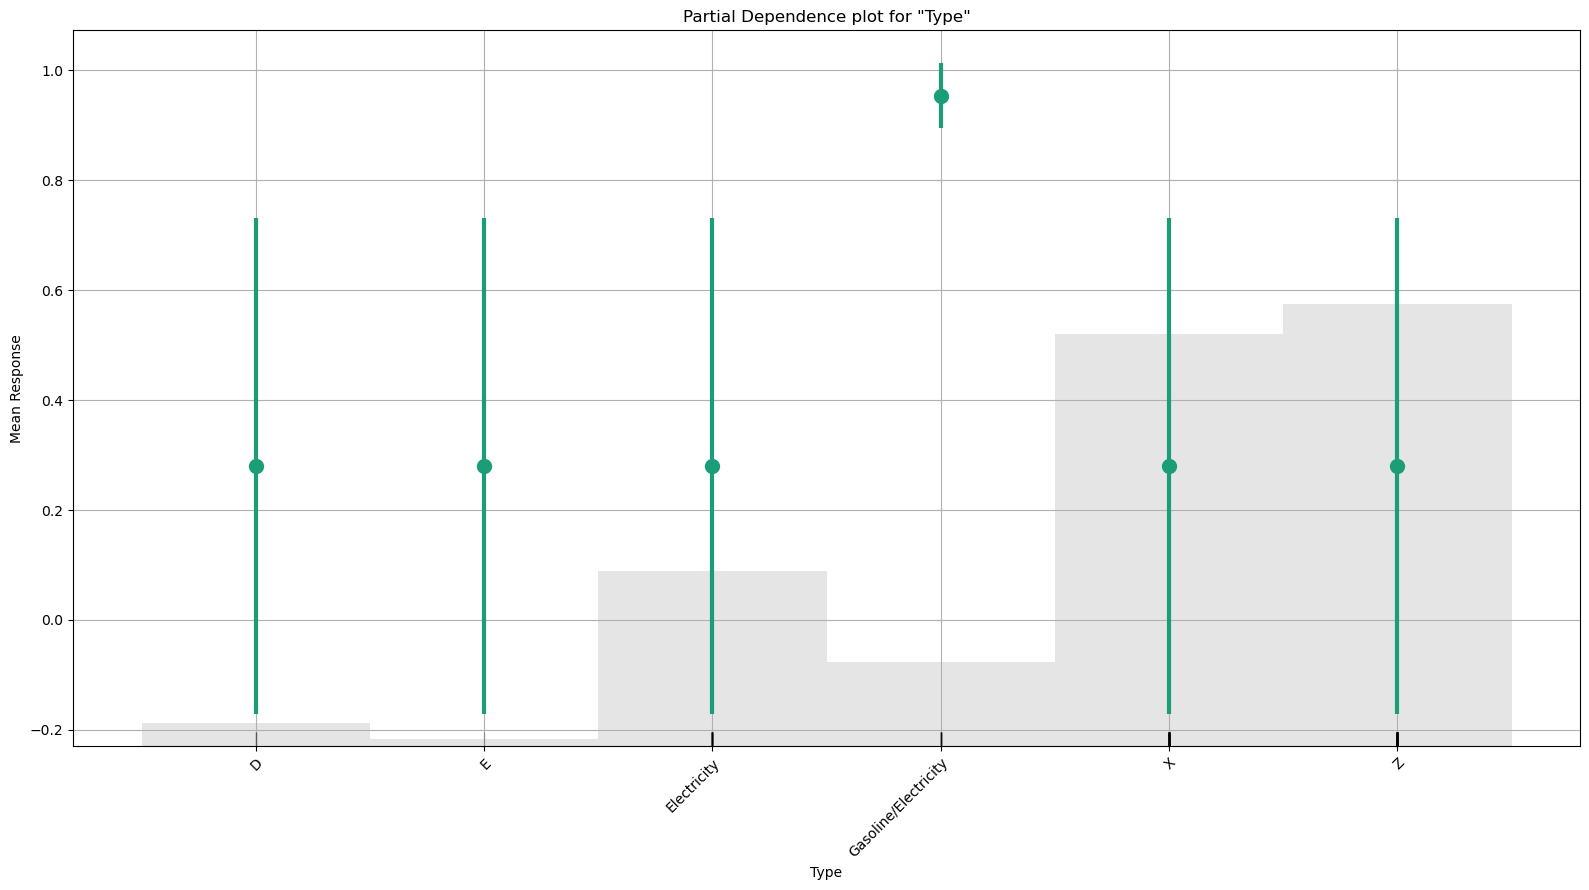

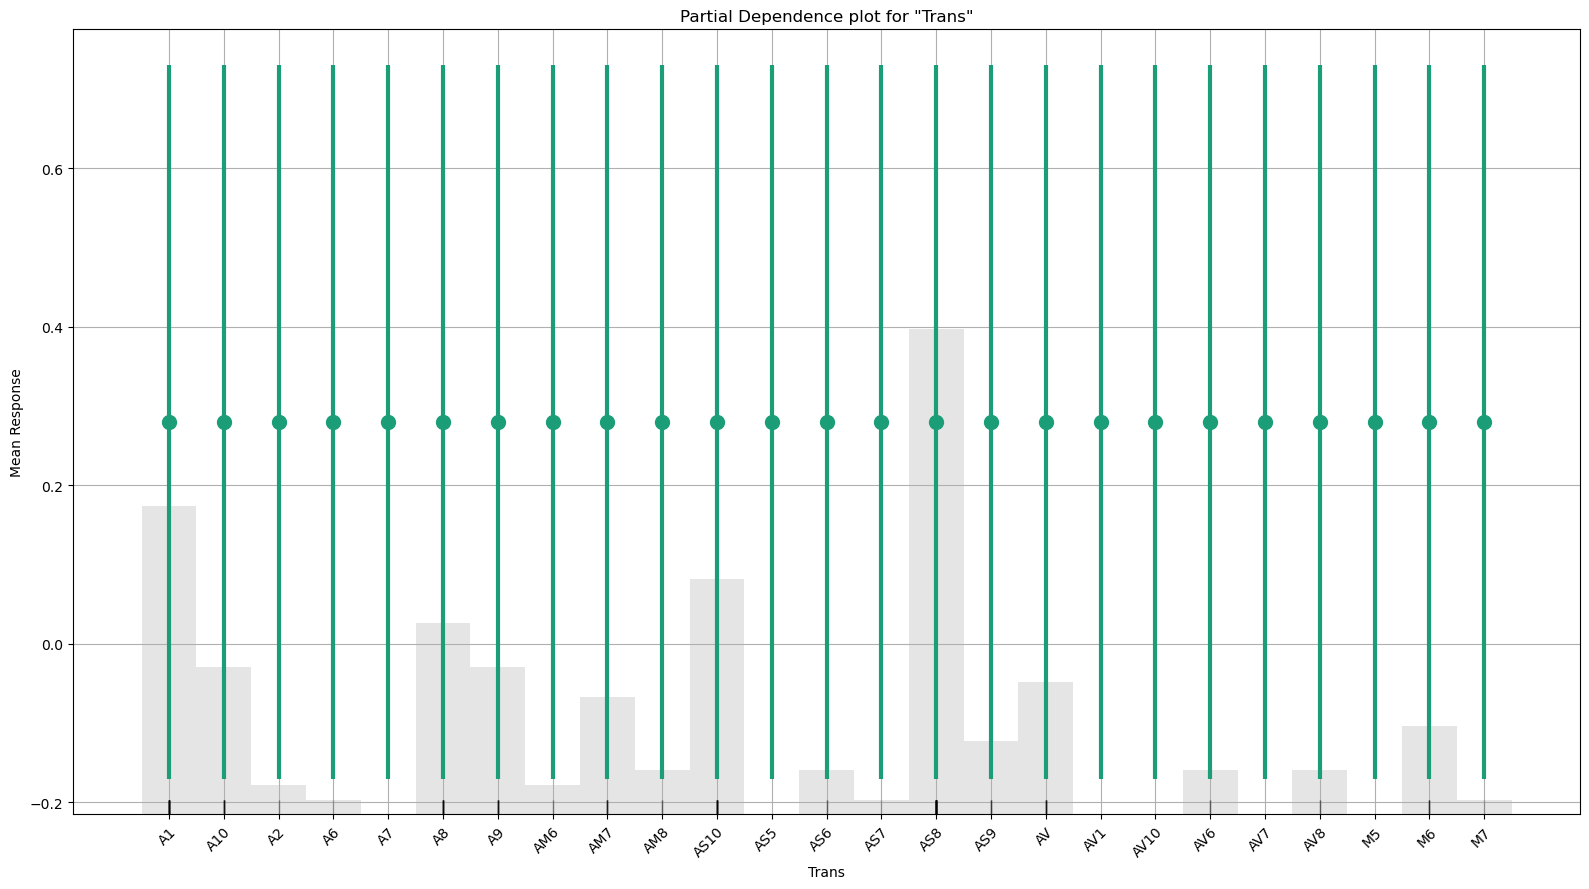

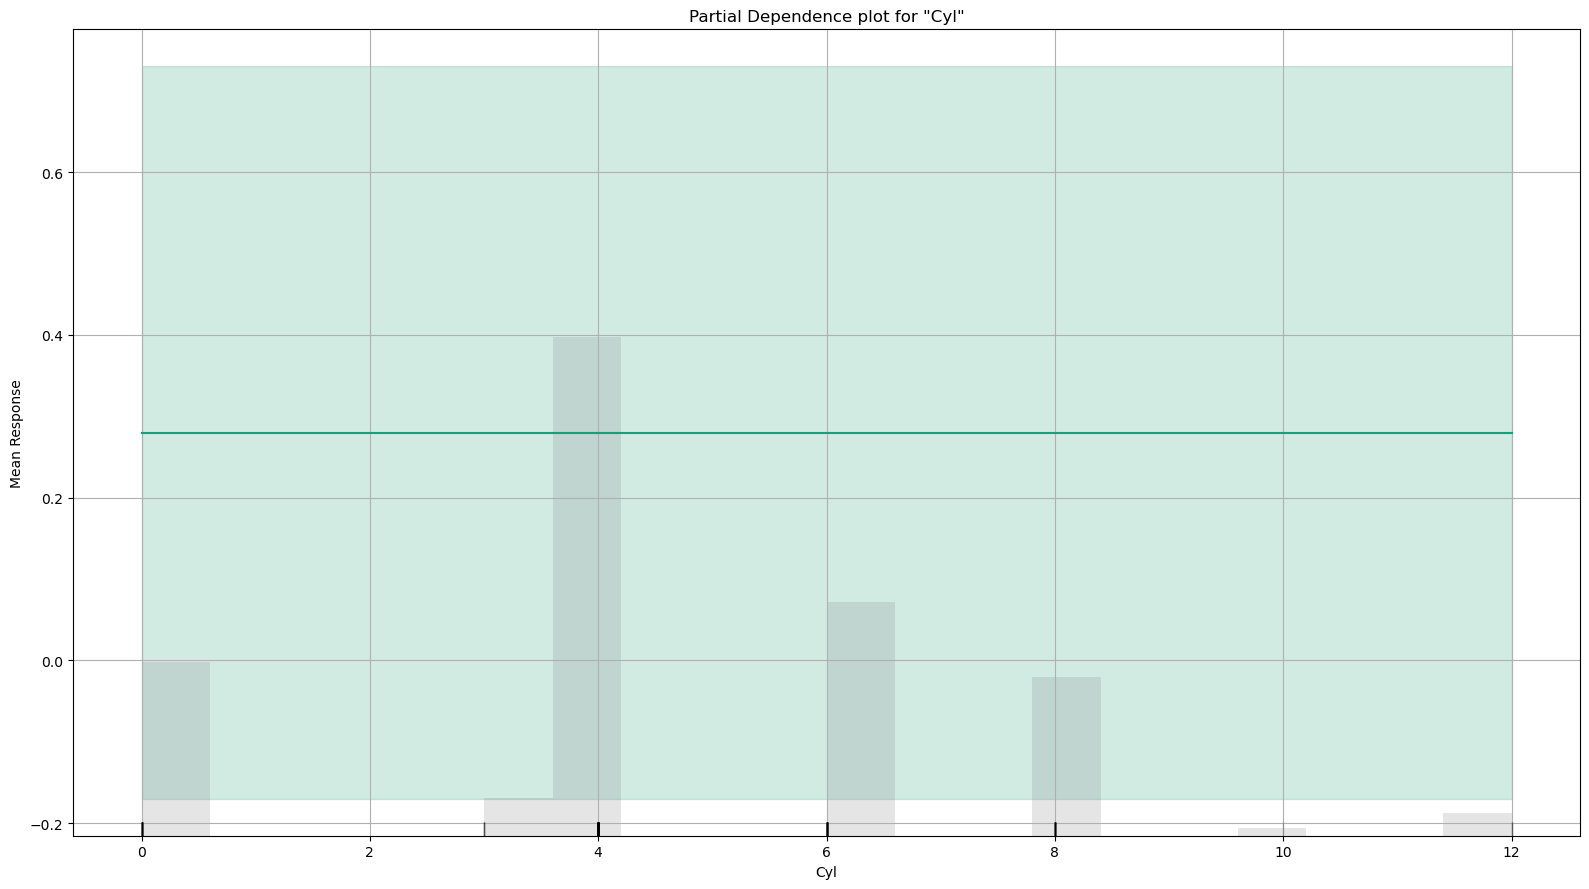

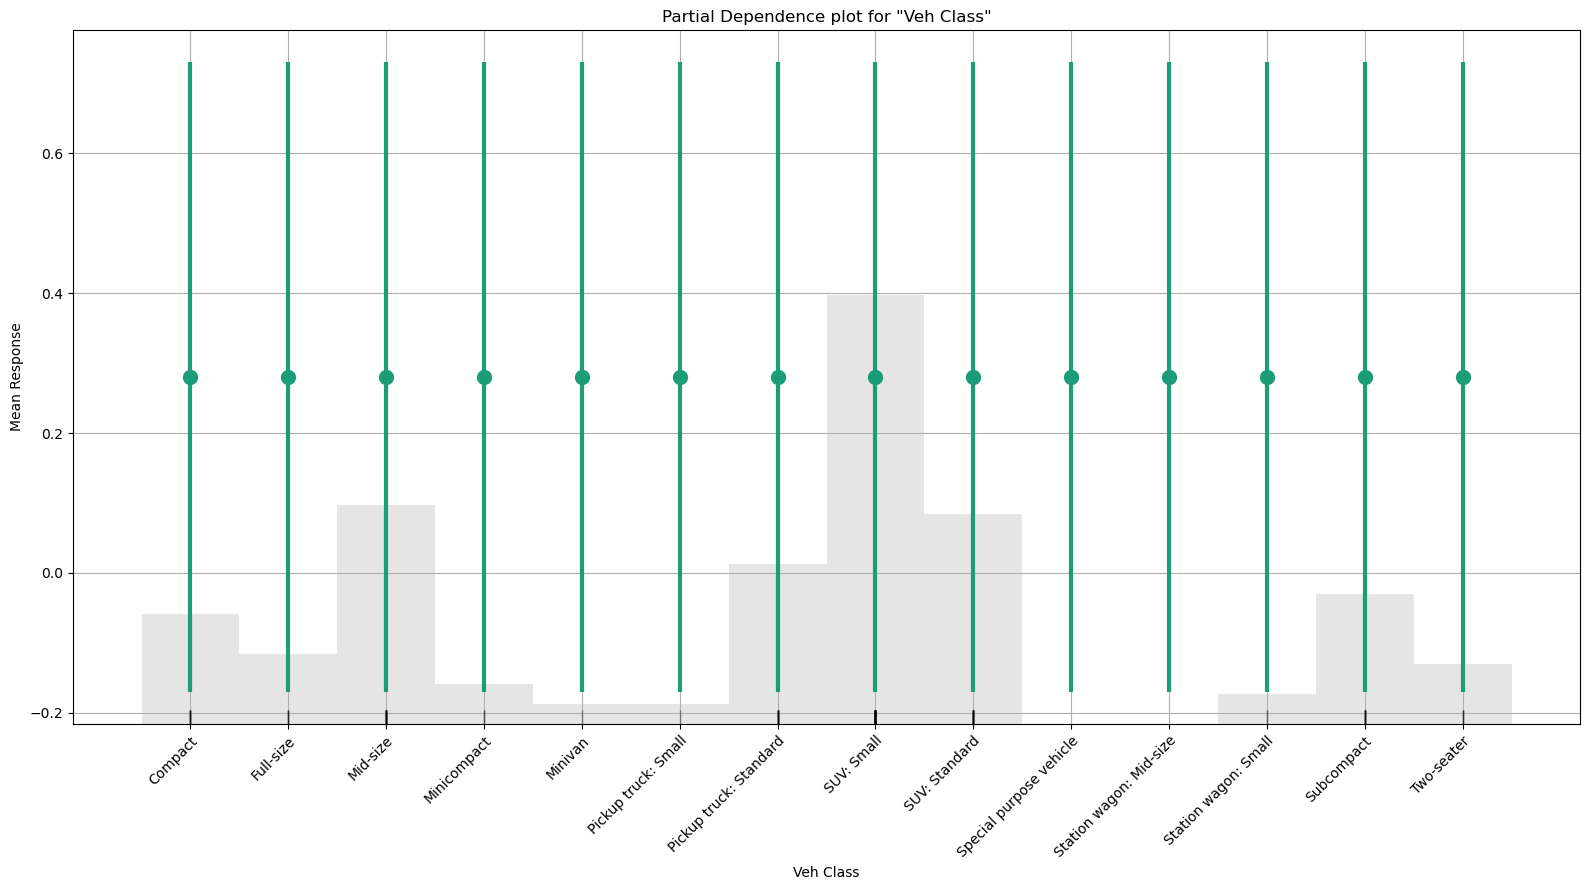

In [38]:
exm = aml.leader.explain(test)